In [161]:
import json
import collections
import matplotlib.pyplot as plt

### Load the data:

In [162]:
route_file = "basic_route.geojson"
illumination_file = "data/illuminated_area_geogr.geojson"
tram_file = "data/tram_area_geogr.geojson"

In [163]:
with open(route_file) as route_in:
    route_json = json.loads(route_in.read())
with open(illumination_file) as illumination_in:
    illumination_json = json.loads(illumination_in.read())
with open(tram_file) as tram_in:
    tram_json = json.loads(tram_in.read())

### Let's extract the Illumination coordinates first:

In [164]:
#Extract coordinates
polygon_list = [feature['geometry']['coordinates'] for feature in illumination_json['features']]

In [165]:
#This list has a weird structure, flatten it
def flatten(l):
    for el in l:
        if isinstance(el, collections.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el
illumination_flattened_coordinates = list(flatten(polygon_list))
illumination_coordinates = list(zip(illumination_flattened_coordinates[::2], illumination_flattened_coordinates[1::2]))

In [166]:
illumination_coordinates

[(8.64230382078778, 49.361360468436295),
 (8.641964155820375, 49.361289664016844),
 (8.641725763739846, 49.36123474084224),
 (8.641666885057347, 49.36121148626029),
 (8.64154717225541, 49.361179638947895),
 (8.641418251149071, 49.36117351238875),
 (8.641292741238201, 49.36119370628339),
 (8.641182928131283, 49.36123824394214),
 (8.641099561011702, 49.36130276576606),
 (8.641050800466655, 49.361380955972855),
 (8.64104141965951, 49.36146516080557),
 (8.641072337045303, 49.361547137718226),
 (8.641140526390975, 49.36161886221001),
 (8.6412393129369, 49.361673313330506),
 (8.641334513217775, 49.36171091350569),
 (8.641410862819662, 49.361734481091176),
 (8.64169516410058, 49.361799981429236),
 (8.641706981400997, 49.36180257375297),
 (8.642087883179917, 49.361881974167424),
 (8.64212856500024, 49.361888985567376),
 (8.64223716555529, 49.361903885647756),
 (8.642364838592096, 49.36190820159045),
 (8.642454639075916, 49.36190210155865),
 (8.642610382975445, 49.36187037000723),
 (8.642690883

### Now extract the Tram coordinates: 

In [167]:
#Extract coordinates
tram_polygon_list = [feature['geometry']['coordinates'] for feature in tram_json['features']]
tram_flattened_coordinates = list(flatten(tram_polygon_list))
tram_coordinates = list(zip(tram_flattened_coordinates[::2], tram_flattened_coordinates[1::2]))

In [168]:
tram_coordinates

[(8.627320354085724, 49.39949902626703),
 (8.627305115768818, 49.399417242084766),
 (8.627303493115328, 49.39941061022493),
 (8.627282292930973, 49.399340810249086),
 (8.627268889079279, 49.399316192311574),
 (8.627230088993791, 49.39926839235189),
 (8.627211147547499, 49.399250621756174),
 (8.627164947532627, 49.39921682179689),
 (8.627149811304083, 49.39920731730164),
 (8.627110811321296, 49.399186317331),
 (8.62708245509711, 49.399174519725165),
 (8.62701245518582, 49.39915271976099),
 (8.626981161197477, 49.39914583501453),
 (8.62690306133088, 49.39913523503367),
 (8.626887352918594, 49.399133712918626),
 (8.62675795315192, 49.39912611293287),
 (8.626751992198683, 49.39912584769071),
 (8.626527592607067, 49.399119047704),
 (8.626484735998343, 49.39912215613524),
 (8.626445448722029, 49.39913375564632),
 (8.626413576475809, 49.399152710801566),
 (8.626392239135086, 49.39917716614546),
 (8.626383525358637, 49.3992047278247),
 (8.626386530807544, 49.39922237777034),
 (8.62637944453070

### Define a function that decides whether two points are virtually the same:

In [169]:
def isApproxSamePoint(point1, point2, long_epsilon = 0.0005, lat_epsilon = 0.0005):
    return (abs(point1[0] - point2[0]) < long_epsilon) and (abs(point1[1] - point2[1]) < lat_epsilon)

#Basic test
mypoint1 = [8.6543, 49.0123]
mypoint2 = [8.7001, 49.0123]
mypoint3 = [8.6544, 49.0120]
print("Point 1 and 3 should be the same: {}".format(isApproxSamePoint(mypoint1, mypoint3)))
print("Point 1 and 2 should NOT be the same: {}".format(not isApproxSamePoint(mypoint1, mypoint2)))

Point 1 and 3 should be the same: True
Point 1 and 2 should NOT be the same: True


### Calc the intersection for the illumination and the Tram:

In [170]:
illu_intersect_count = sum([any(isApproxSamePoint(route_point, illuminate_point, long_epsilon = 0.0005, lat_epsilon = 0.0005)
     for illuminate_point in illumination_coordinates) 
 for route_point in route_json['coordinates']])

tram_intersect_count = sum([any(isApproxSamePoint(route_point, tram_point, long_epsilon = 0.0005, lat_epsilon = 0.0005)
     for tram_point in tram_coordinates) 
 for route_point in route_json['coordinates']])

In [171]:
tram_coordinates

[(8.627320354085724, 49.39949902626703),
 (8.627305115768818, 49.399417242084766),
 (8.627303493115328, 49.39941061022493),
 (8.627282292930973, 49.399340810249086),
 (8.627268889079279, 49.399316192311574),
 (8.627230088993791, 49.39926839235189),
 (8.627211147547499, 49.399250621756174),
 (8.627164947532627, 49.39921682179689),
 (8.627149811304083, 49.39920731730164),
 (8.627110811321296, 49.399186317331),
 (8.62708245509711, 49.399174519725165),
 (8.62701245518582, 49.39915271976099),
 (8.626981161197477, 49.39914583501453),
 (8.62690306133088, 49.39913523503367),
 (8.626887352918594, 49.399133712918626),
 (8.62675795315192, 49.39912611293287),
 (8.626751992198683, 49.39912584769071),
 (8.626527592607067, 49.399119047704),
 (8.626484735998343, 49.39912215613524),
 (8.626445448722029, 49.39913375564632),
 (8.626413576475809, 49.399152710801566),
 (8.626392239135086, 49.39917716614546),
 (8.626383525358637, 49.3992047278247),
 (8.626386530807544, 49.39922237777034),
 (8.62637944453070

### Now plot it into a donut plot:

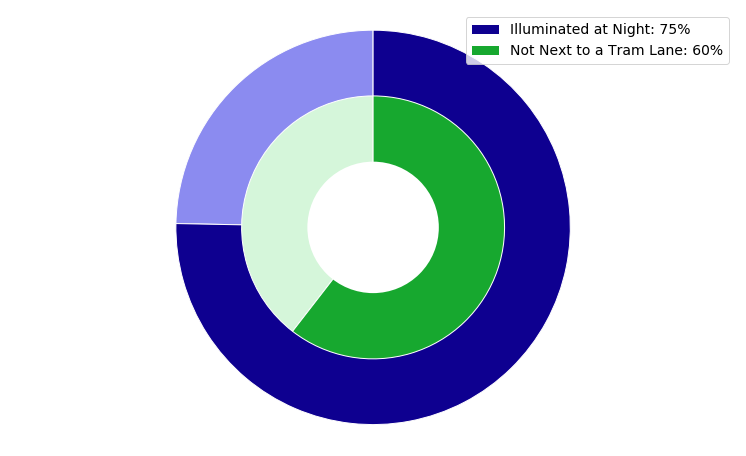

In [244]:
illuminated_label = "Illuminated at Night"
no_tram_label = "Not Next to a Tram Lane"

illu_pos = 6
tram_pos = 4
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
plt.figure(figsize=(13,8))
#plt.text(5.5, illu_pos-1,
#         ,
#         horizontalalignment='center', verticalalignment='center',
#        fontdict=font)
#plt.text(4.5, tram_pos-1, 
#         , 
#         horizontalalignment='center', verticalalignment='center',
#        fontdict=font)
patch1, text1 = plt.pie([len(route_json['coordinates']) - illu_intersect_count, illu_intersect_count],
       radius = illu_pos, startangle = 90, colors = ['#8B8BF0', '#0E0090'],
        wedgeprops={"edgecolor": "white", 'linewidth': 1}
       )
patch2, text2 = plt.pie([tram_intersect_count, len(route_json['coordinates']) - tram_intersect_count],
       radius = tram_pos, startangle = 90, colors = ['#d5f6da', '#17A82F'],
        wedgeprops={"edgecolor": "white", 'linewidth': 1}
       )
labels = ["{}: {:.0f}%".format(illuminated_label, illu_intersect_count/len(route_json['coordinates']) * 100),
          "{}: {:.0f}%".format(no_tram_label,100 - tram_intersect_count/len(route_json['coordinates']) * 100)]
plt.legend([patch1[1], patch2[1]], labels, loc='upper right', prop={'size':14})
plt.axis("equal")
circle = plt.Circle(xy=(0, 0), radius=2, facecolor='white')
plt.gca().add_artist(circle)
plt.savefig("route_piechart.png");